2099 419
k_fold 0


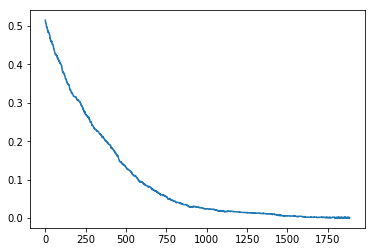

Test score: 0.9952267303102625
k_fold 1


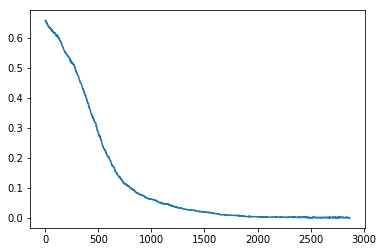

Test score: 0.9952267303102625
k_fold 2


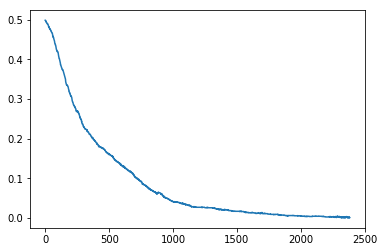

Test score: 0.9928400954653938
k_fold 3


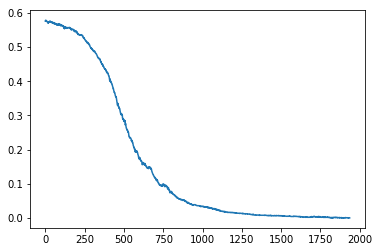

Test score: 1.0
k_fold 4


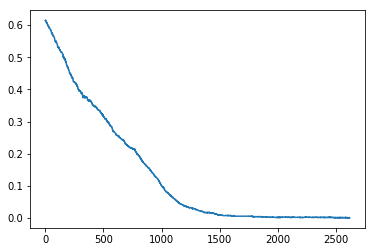

Test score: 0.9976133651551312


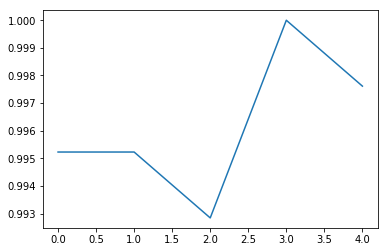

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from get_data import fig_data,xor_data,donut_data


def get__data():

    w=np.array([-0.5,0.5])
    x=np.random.random((1000,2))*2-1
    b=0.1
    #y=np.dot((w.T),x)
    y=np.sign(np.dot(x,w)+b)
    return x,y

class perceptrons:
        
    
    def fit(self,x,y,learning_rate=1.0,epochs=10000):
        
        D=np.shape(x)[1]
        N=np.shape(x)[0]
        self.w=np.random.randn(D)
        self.b=0
        costs=[]
        
        for i in range(epochs):
            
            Y_pred=self.predict(x)
            
            list_false=np.nonzero(Y_pred!=y)[0]
            
            if len(list_false)==0:
                
                break
            
            #for j in list_false:       #all the content change at the time, does not work. one by one works
                
            #    self.w=self.w+learning_rate*y[j]*x[j]
            #    self.b=self.b+learning_rate**y[j]*1
            #choose one sample 
            j=np.random.choice(list_false)
            self.w=self.w+learning_rate*y[j]*x[j]
            self.b=self.b+learning_rate*y[j]*1
            
            accu=len(list_false)/float(N)
            costs.append(accu)
                
        #print('w,b,iteration',self.w,self.b,i)    
        plt.plot(costs)
        plt.show()
            
    def predict(self,x):
        
        return np.sign(np.dot(x,self.w)+self.b)
    
    def score(self,x,y):
        Y_pred=self.predict(x)
        score_=np.mean(Y_pred==y)
        return score_
        
            
                
if __name__=='__main__':
    
    Xtrain_,Ytrain_,Xtest_,Ytest_=fig_data(limit=20000,ratio=0.5)
    idx = np.logical_or(Ytrain_ == 0., Ytrain_ == 1.)
    Xtrain_ = Xtrain_[idx]
    Ytrain_ = Ytrain_[idx]
    Ytrain_[Ytrain_==0.]=-1.
    
    K_fold=5
    
    X_N=np.shape(Xtrain_)[0]
    x_div=int(X_N/K_fold)
    
    print(X_N,x_div)
    percep=perceptrons()
    score_=[]
    
    for k in range(K_fold):
        k=int(k)
        print('k_fold',k)
        xeval=Xtrain_[k*x_div:(k+1)*x_div]
        yeval=Ytrain_[k*x_div:(k+1)*x_div]
        
        xtrain=np.concatenate((Xtrain_[0:(k)*x_div],Xtrain_[(k+1)*x_div:X_N]),axis=0)
        ytrain=np.concatenate((Ytrain_[0:(k)*x_div],Ytrain_[(k+1)*x_div:X_N]),axis=0)
                         
        percep.fit(xtrain,ytrain,learning_rate=0.001)
        #print('Train score:',percep.score(Xtrain,Ytrain))
        print('Test score:',percep.score(xeval,yeval))
        score_.append(percep.score(xeval,yeval))
                         
                         
    plt.plot(score_)                     



    
    


In [78]:
np.nonzero(1!=2)

(array([0], dtype=int64),)

In [63]:
x=np.random.random((200,2))
np.random.rand(2)

array([0.01270435, 0.39202302])

In [75]:
y=np.sign(np.dot(x,w))


In [76]:
y=np.dot(x,w)
